In [ ]:
def forecast_with_linear_regression(csv, months):
    import pandas
    from sklearn.linear_model import LinearRegression

    df = pandas.read_csv(csv)

    df['timestamp'] = pandas.to_datetime(df['timestamp'])

    df.set_index('timestamp', inplace=True)
    df = df.resample('M').median()

    df2 = df.copy()
    df2['timestamp'] = df2.index.view('int64')
    df2.set_index('timestamp', inplace=True)


    X = df2.index.values.reshape(-1, 1)
    y = df2['value'].values


    model = LinearRegression()
    model.fit(X, y)

    # Generate timestamps for the next N months
    last_date = df2.index[-1]
    next_months_num = pandas.date_range(start=last_date, periods=months, freq='M').view('int64')
    predictions = model.predict(next_months_num.reshape(-1, 1))

    next_months = pandas.to_datetime(next_months_num)

    forecast_df = pandas.DataFrame({'date': next_months, 'prediction': predictions})

    forecast_df.set_index('date', inplace=True)

    combined_df = pandas.concat([df, forecast_df])
    combined_df

    combined_df.plot(marker='o')
    
    
def forecast_with_polyminal_regression(csv, months):    
    import pandas
    import numpy
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import LinearRegression

    df = pandas.read_csv(csv)

    df['timestamp'] = pandas.to_datetime(df['timestamp'])

    df.set_index('timestamp', inplace=True)
    df = df.resample('M').median()

    df2 = df.copy()
    df2['timestamp'] = df2.index.view('int64')
    df2.set_index('timestamp', inplace=True)


    X = df2.index.values.reshape(-1, 1)
    y = df2['value'].values
    
    # Create polynomial features for X
    poly_features = PolynomialFeatures(degree=10)
    X_poly = poly_features.fit_transform(X)

    # Fit the polynomial regression model to the data
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y)

    # Get the last date from the original data
    last_date = df.index[-1]

    # Generate timestamps for the next N months
    next_months = pandas.date_range(start=last_date, periods=months, freq='M')

    # Convert the timestamps to the corresponding numerical representation
    next_months_num = next_months.astype(numpy.int64).values.reshape(-1, 1)

    # Create polynomial features for the next N months timestamps
    next_months_poly = poly_features.transform(next_months_num)

    # Perform predictions for the next N months
    predictions = poly_reg.predict(next_months_poly)

    forecast_df = pandas.DataFrame({'date': next_months, 'prediction': predictions})
    forecast_df.set_index('date', inplace=True)

    combined_df = pandas.concat([df, forecast_df])

    combined_df.plot(marker='o')
    

In [122]:
# A seguir gráficos de projeções de 3 e 6 meses de dados de consumo de servidores
# usando regressão linear e polinominal. Para cada tipo de regressão e periodo de 
# projeção é mostrado a projeção sem a limpeza dos dados (com outliers) e após a 
# limpeza. Esses outliers são referentes a migração de aplicações de servidores,
# é possivel observar que nas projeções com outilers que o consome chega a mais de 
# 80 então a aplicação é migrada de servidor, então o consumo volta a ser baixo 
# novamente. Isso leva a uma projeção menos acertiva. Nas projeções sem outilers
# podemos ver um crescimento mais linear.


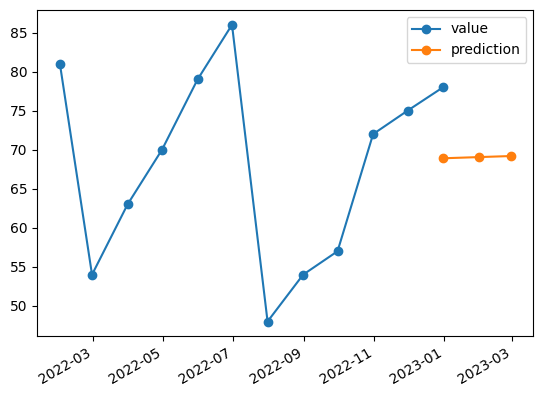

In [123]:
# Projeção dos próximos 3 meses de consumo de CPU usando Regressão Lienar com outliers

forecast_with_linear_regression('cpu-with-outliers.csv', 3)


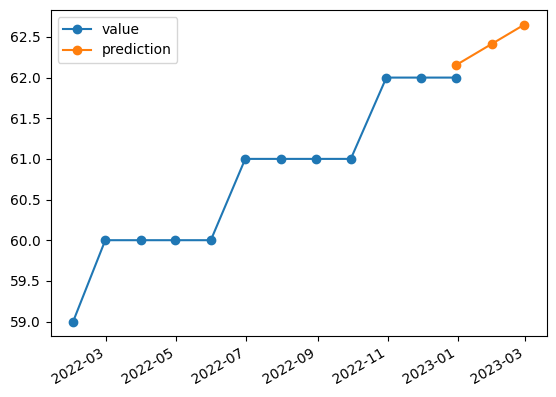

In [124]:
# Projeção dos próximos 3 meses de consumo de CPU usando Regressão Linear sem outliers
forecast_with_linear_regression('cpu-without-outliers.csv', 3)


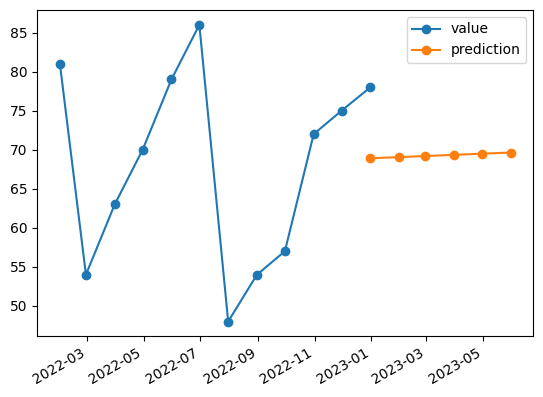

In [125]:
# Projeção dos próximos 3 meses de consumo de CPU usando Regressão Linear com outliers

forecast_with_linear_regression('cpu-with-outliers.csv', 6)


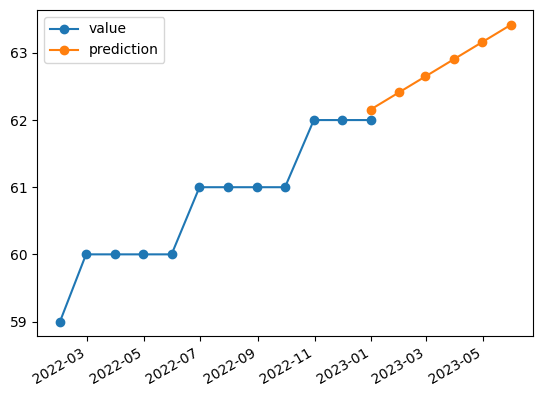

In [126]:
# Projeção dos próximos 6 meses de consumo de CPU usando Regressão Linear sem outliers

forecast_with_linear_regression('cpu-without-outliers.csv', 6)


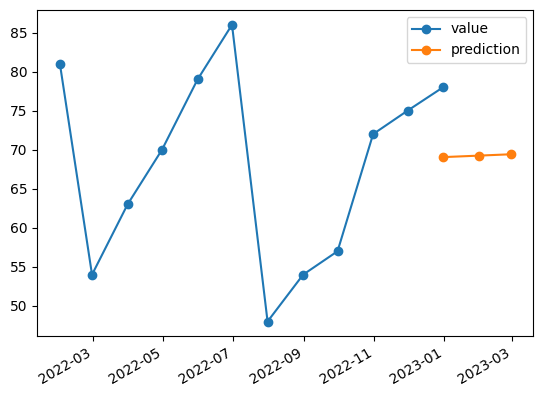

In [129]:
# Projeção dos próximos 3 meses de consumo de CPU usando Regressão Polinominal com outliers
forecast_with_polyminal_regression('cpu-with-outliers.csv', 3)


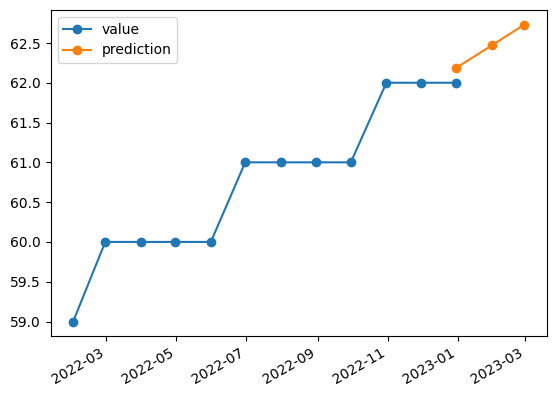

In [130]:
# Projeção dos próximos 3 meses de consumo de CPU usando Regressão Polinominal com outliers
forecast_with_polyminal_regression('cpu-without-outliers.csv', 3)


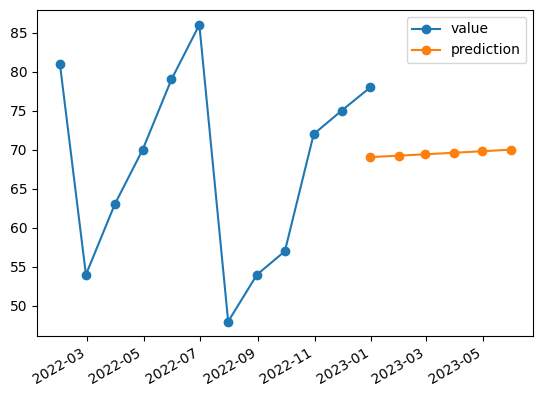

In [131]:
# Projeção dos próximos 6 meses de consumo de CPU usando Regressão Polinominal com outliers
forecast_with_polyminal_regression('cpu-with-outliers.csv', 6)


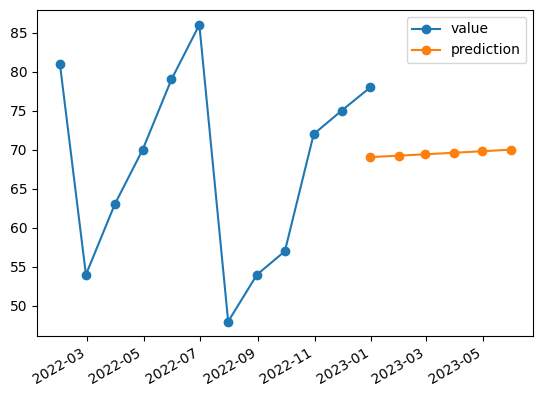

In [132]:
# Projeção dos próximos 6 meses de consumo de CPU usando Regressão Polinominal sem outliers
forecast_with_polyminal_regression('cpu-with-outliers.csv', 6)


In [133]:
# Podemos visualizar que o consumo de disco é pouco pela aplicação, porém mesmo assim
# é possivel visualizar a necessidade de se realizar a limpeza dos dados. Um outro fator
# que pode trazer dificuldade na analise dos dados é que o espaço em disco pode ser alterado
# sem necessariamente mudar de servidor, pois podemos simplemente adicionar mais HDs, no caso 
# de CPU é comum a aplicação mudar totalmente de servidor, nesse caso os valores do passado
# que tinha menos espaço em disco (que leva o consumo alto) é mantido, então a projeção nesses
# casos pode não ser tão acertiva.

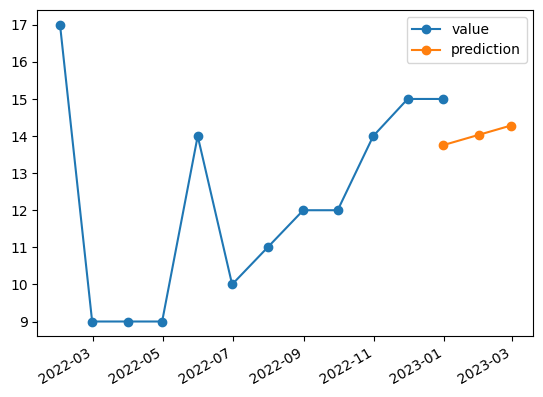

In [134]:
# Projeção dos próximos 3 meses de consumo de Disco usando Regressão Linear com outliers
forecast_with_linear_regression('disk-with-outliers.csv', 3)


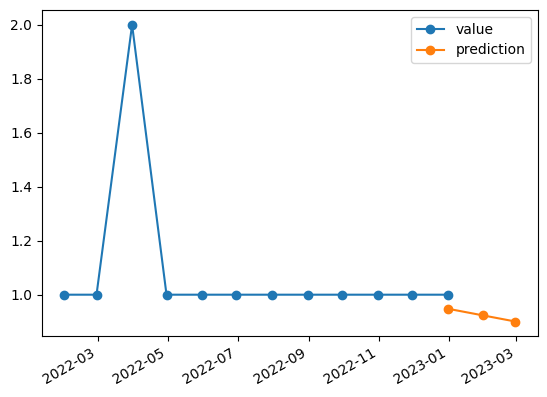

In [135]:
# Projeção dos próximos 3 meses de consumo de Disco usando Regressão Linear sem outliers
forecast_with_linear_regression('disk-without-outliers.csv', 3)


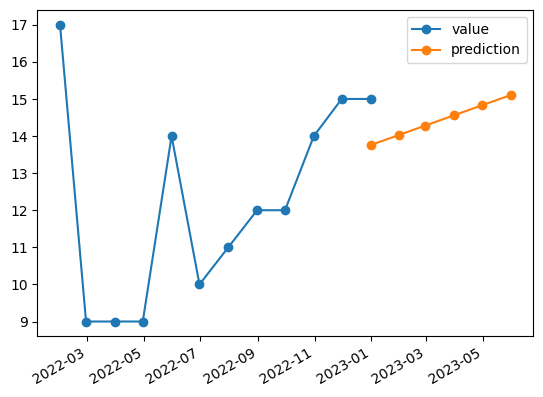

In [146]:
# Projeção dos próximos 6 meses de consumo de Disco usando Regressão Linear com outliers
forecast_with_linear_regression('disk-with-outliers.csv', 6)


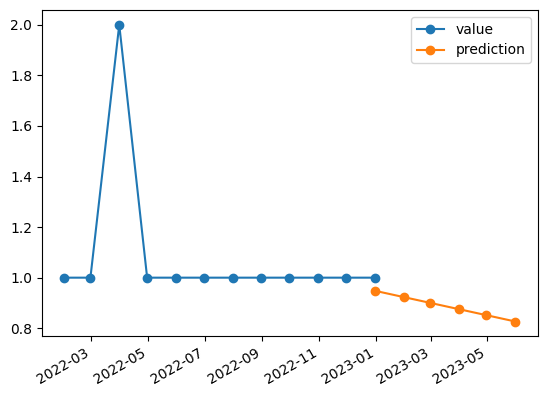

In [147]:
# Projeção dos próximos 6 meses de consumo de Disco usando Regressão Linear sem outliers
forecast_with_linear_regression('disk-without-outliers.csv', 6)


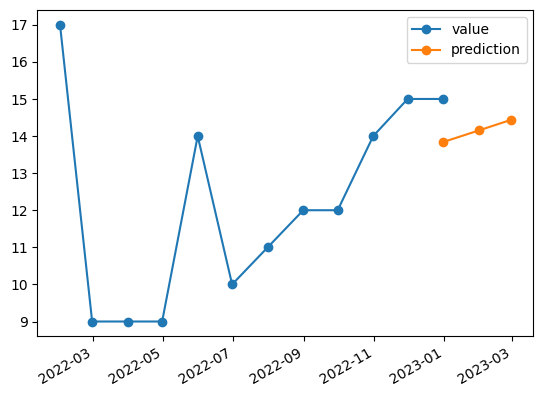

In [148]:
# Projeção dos próximos 3 meses de consumo de Disco usando Regressão Polinominal com outliers
forecast_with_polyminal_regression('disk-with-outliers.csv', 3)


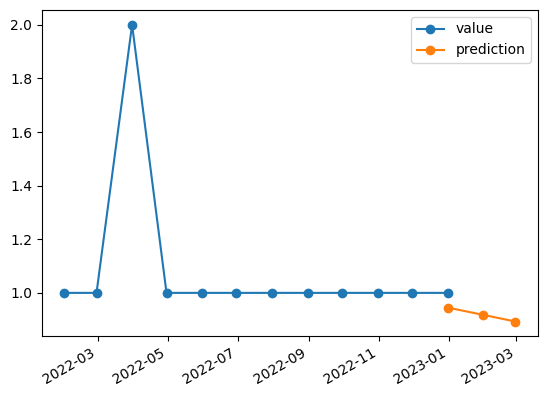

In [149]:
# Projeção dos próximos 3 meses de consumo de Disco usando Regressão Polinominal sem outliers
forecast_with_polyminal_regression('disk-without-outliers.csv', 3)


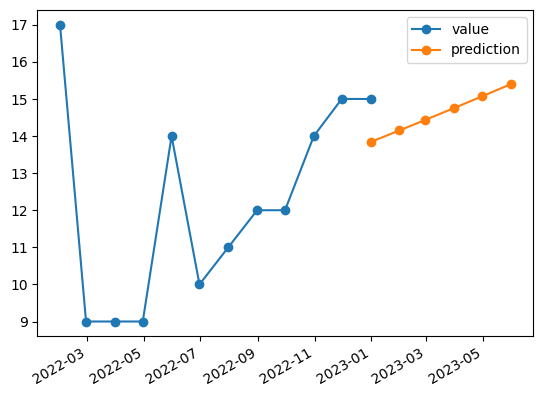

In [150]:
# Projeção dos próximos 6 meses de consumo de Disco usando Regressão Polinominal com outliers
forecast_with_polyminal_regression('disk-with-outliers.csv', 6)


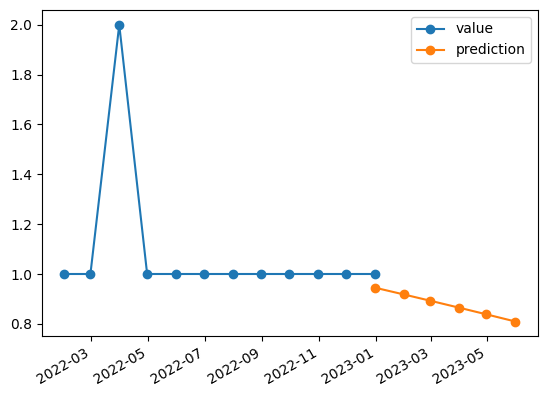

In [127]:
# Projeção dos próximos 6 meses de consumo de Disco usando Regressão Polinominal sem outliers
forecast_with_polyminal_regression('disk-without-outliers.csv', 6)


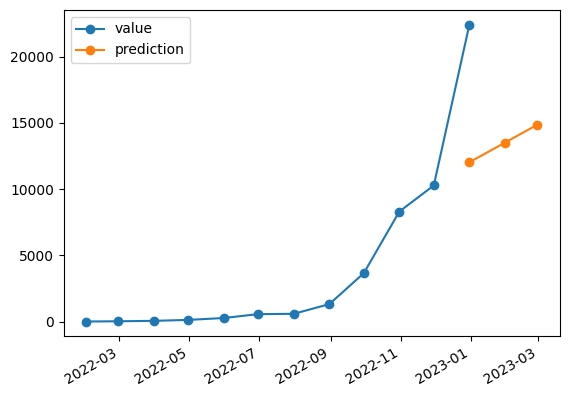

In [138]:
# Projeção dos próximos 3 meses de consumo de Memoria usando Regressão Linear com outliers
forecast_with_linear_regression('memory-with-outliers.csv', 3)


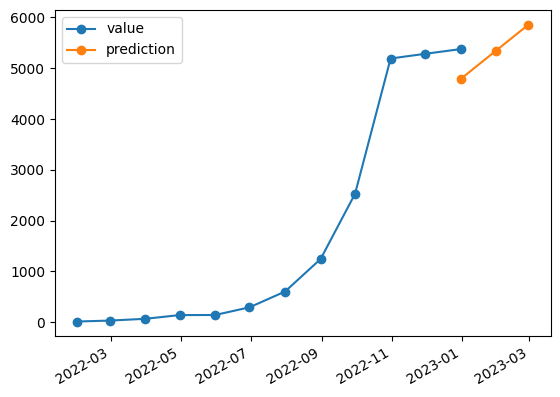

In [151]:
# Projeção dos próximos 3 meses de consumo de Memoria usando Regressão Linear sem outliers
forecast_with_linear_regression('memory-without-outliers.csv', 3)


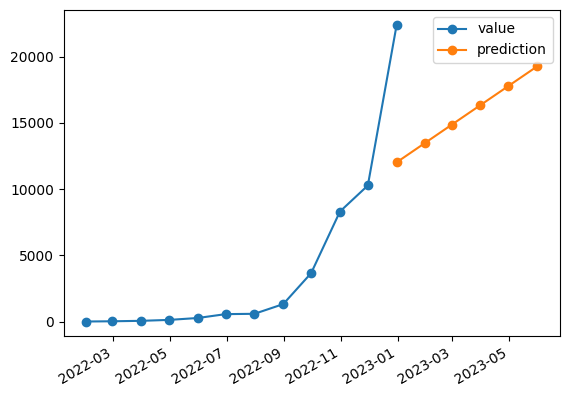

In [152]:
# Projeção dos próximos 6 meses de consumo de Memoria usando Regressão Linear com outliers
forecast_with_linear_regression('memory-with-outliers.csv', 6)


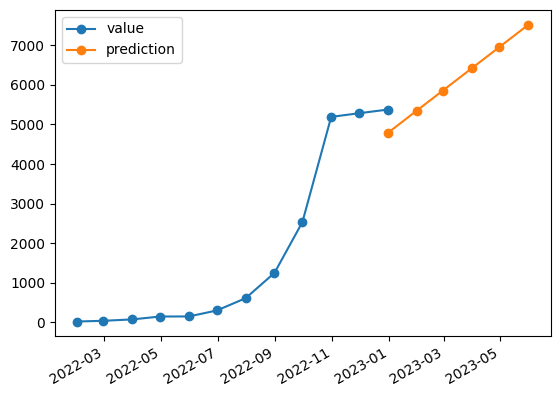

In [153]:
# Projeção dos próximos 6 meses de consumo de Memoria usando Regressão Linear sem outliers
forecast_with_linear_regression('memory-without-outliers.csv', 6)


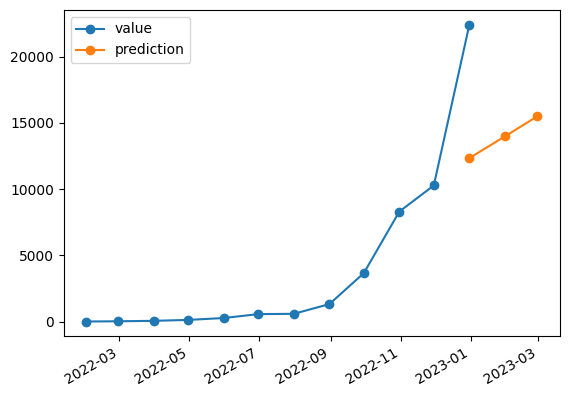

In [155]:
# Projeção dos próximos 3 meses de consumo de Memoria usando Regressão Polinminal com outliers
forecast_with_polyminal_regression('memory-with-outliers.csv', 3)


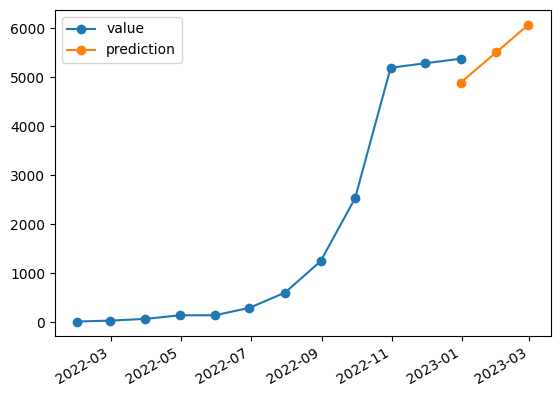

In [157]:
# Projeção dos próximos 3 meses de consumo de Memoria usando Regressão Polinminal sem outliers
forecast_with_polyminal_regression('memory-without-outliers.csv', 3)


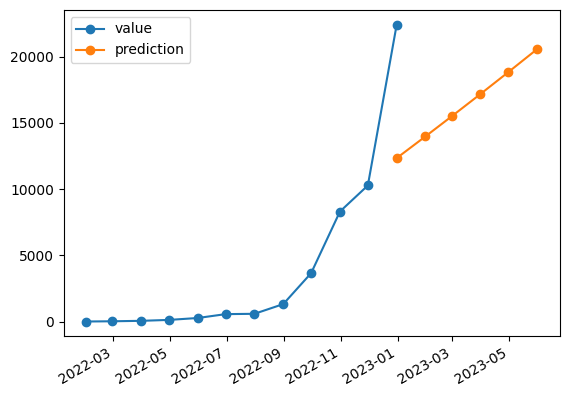

In [158]:
# Projeção dos próximos 6 meses de consumo de Memoria usando Regressão Polinminal com outliers
forecast_with_polyminal_regression('memory-with-outliers.csv', 6)


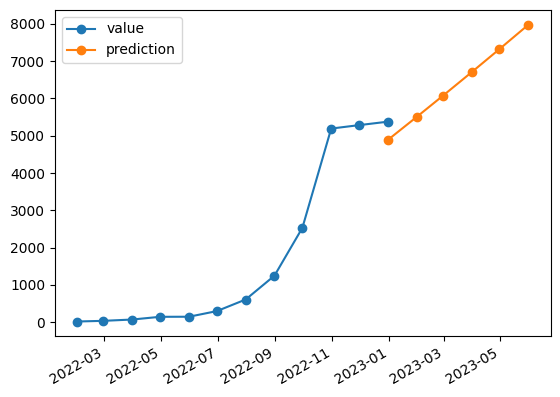

In [159]:
# Projeção dos próximos 6 meses de consumo de Memoria usando Regressão Polinminal sem outliers
forecast_with_polyminal_regression('memory-without-outliers.csv', 6)
